<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/2_6_Neural_Networks_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

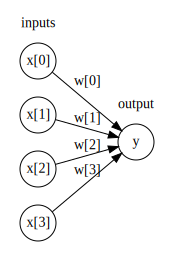

In [3]:
# Visualizing linear regression model
import mglearn

display(mglearn.plots.plot_logistic_regression_graph())

Nodes on left ➡ input features <br/>
Connecting lines ➡ learned coeff <br/>
Node on right ➡ output (i.e. weighted sum of inputs)

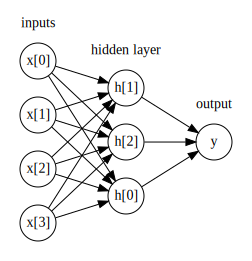

In [4]:
# Visualizing hidden units
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(X), tanh(X)')

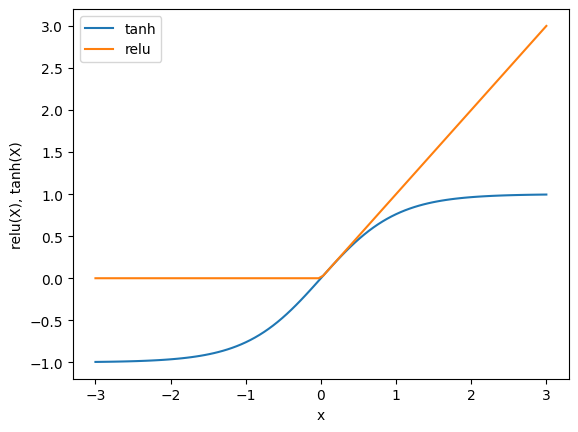

In [5]:
# Graphs of hyperbolic tangent and relu activation functions
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), label = "relu")
plt.legend(loc = "best")
plt.xlabel("x")
plt.ylabel("relu(X), tanh(X)")

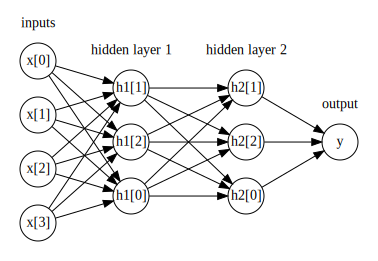

In [6]:
# Additional hidden layer in neural network
mglearn.plots.plot_two_hidden_layer_graph()

### MLP Classifier

Applied on 2 moons dataset.

Text(0, 0.5, 'Feature 1')

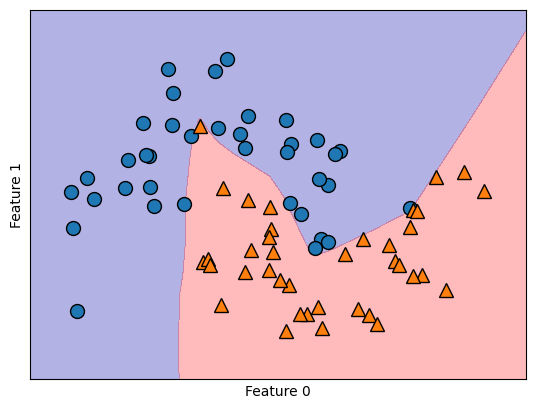

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, shuffle= True, noise= 0.25, random_state= 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42,
                                                    shuffle = True, stratify= y)

mlp = MLPClassifier(solver= 'lbfgs', random_state= 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

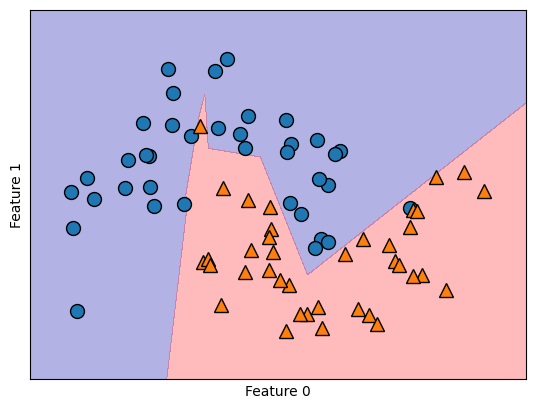

In [8]:
# Reducing the no. of hidden nodes in MLP
mlp = MLPClassifier(solver= 'lbfgs', random_state= 0, hidden_layer_sizes= [10]) # by default 100
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

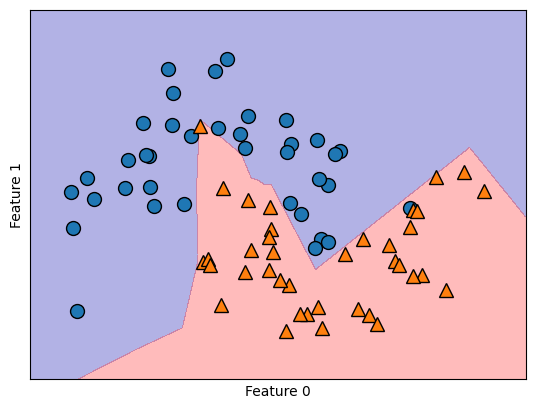

In [9]:
# Using 2 hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

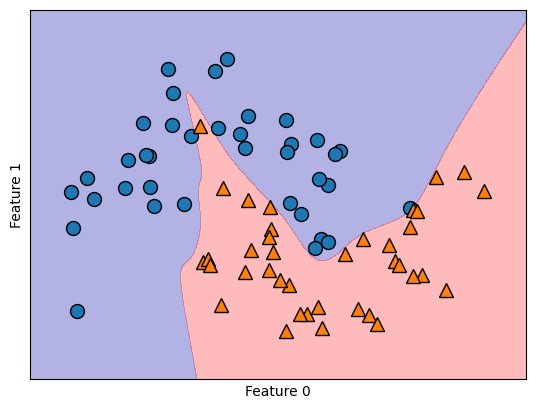

In [11]:
# Using 2 hidden layers, with 10 units each; and with tanh non-linearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=10000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

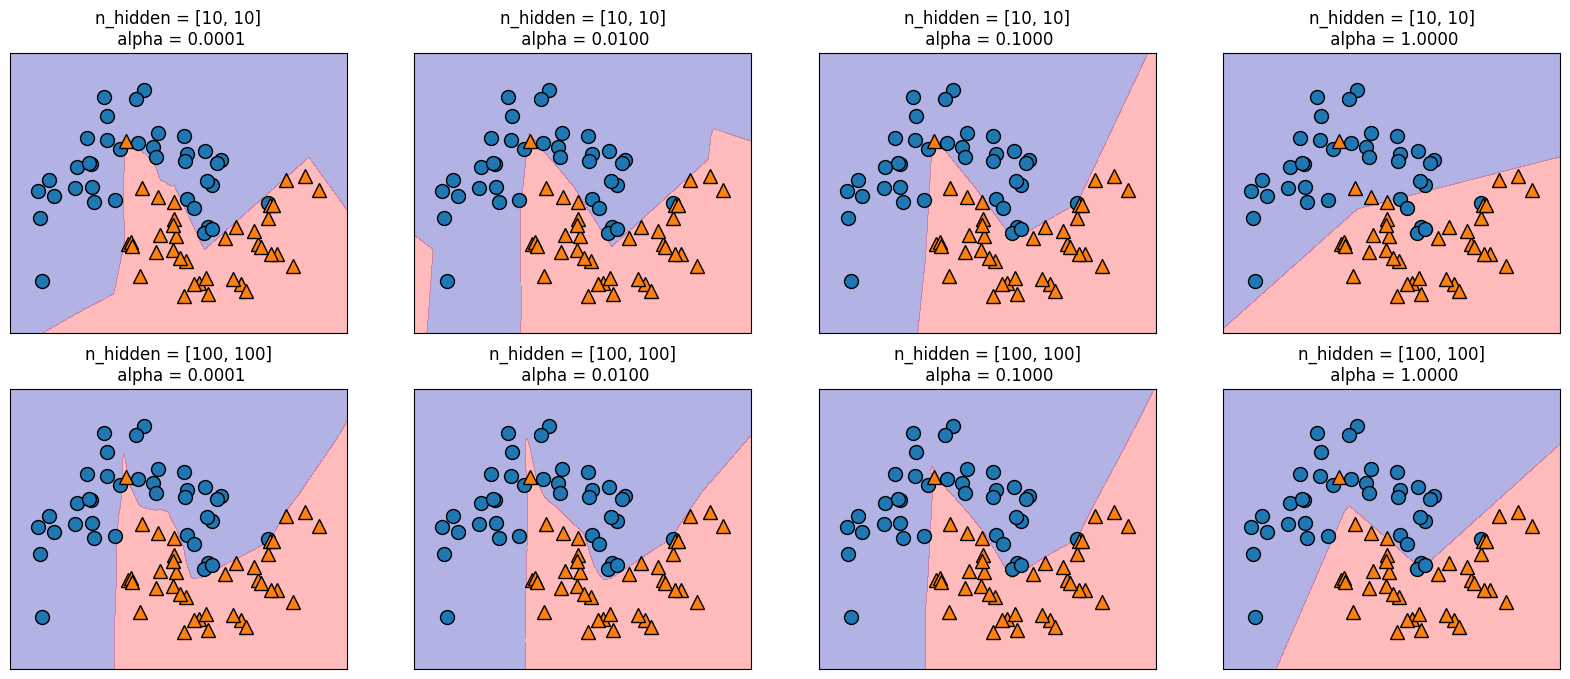

In [13]:
# Using L2 penalty (regularization) to control model complexity by shrinking weights toward zero
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0,
                        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                        alpha = alpha, max_iter=10000)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden = [{}, {}]\n alpha = {:.4f}".format(n_hidden_nodes,
                                                               n_hidden_nodes,
                                                               alpha))

These are decision functions for different numbers of hidden units and different settings of the alpha parameter.

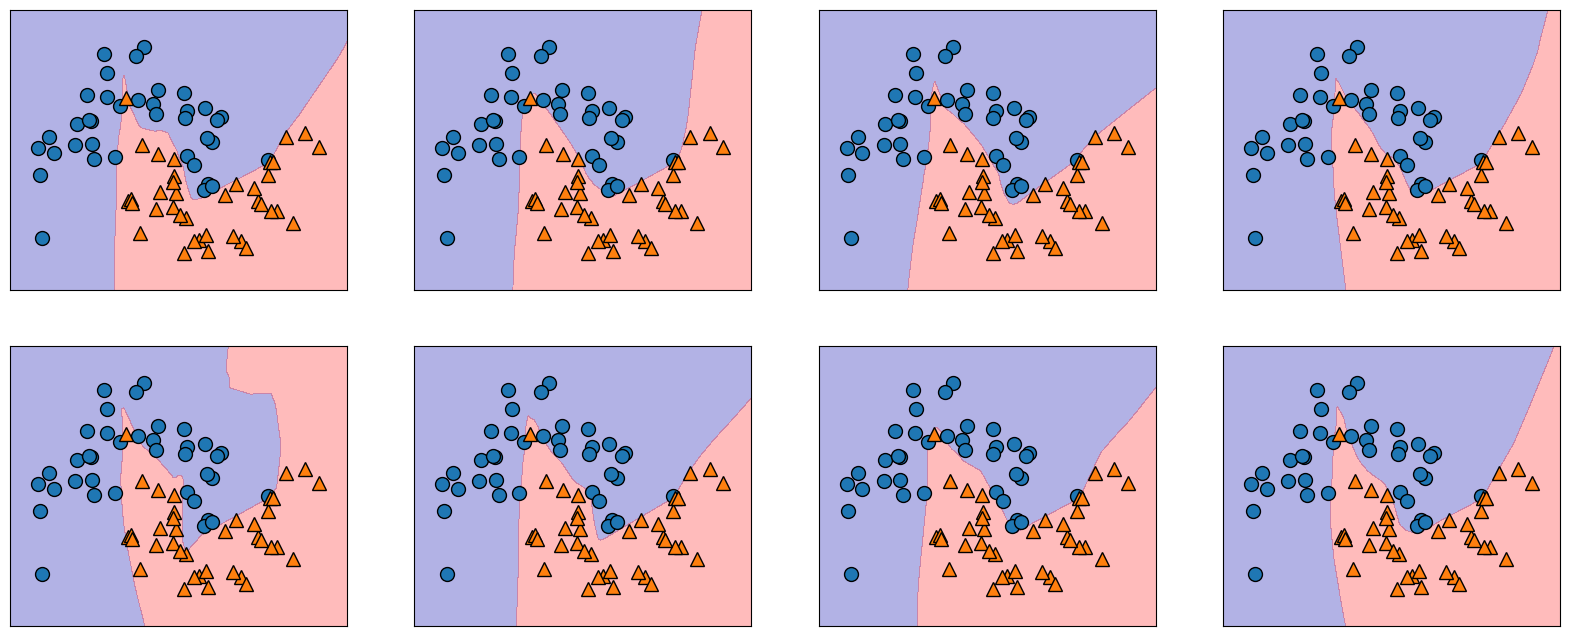

In [15]:
# Random initialization affecting model even with the same parameters.
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
  mlp = MLPClassifier(solver='lbfgs', random_state=i,
                      hidden_layer_sizes=[100, 100], max_iter=10000)
  mlp.fit(X_train, y_train)
  mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

These are decision functions learned with the same parameters but different random initializations.

In [17]:
# Applying MLPClassifier on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n {}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


Though good accuracy, it's not as good as SVC because of data scaling. Neural networks expect all input features to have a mean of 0 and a variance of 1.

In [21]:
# Using Standard scaler to rescale data automatically

# Computing mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

# Computing standard deviation of each feature on training set
std_on_train = X_train.std(axis=0)

# Subtracting the mean, and scaling by inverse standard deviation
# Afterward, mean = 0 & std = 1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# Using the same transformation on test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,
                                                          y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [22]:
#Decreasing model's complexity to get better generalization performanc using alpha parameter
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,
                                                          y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


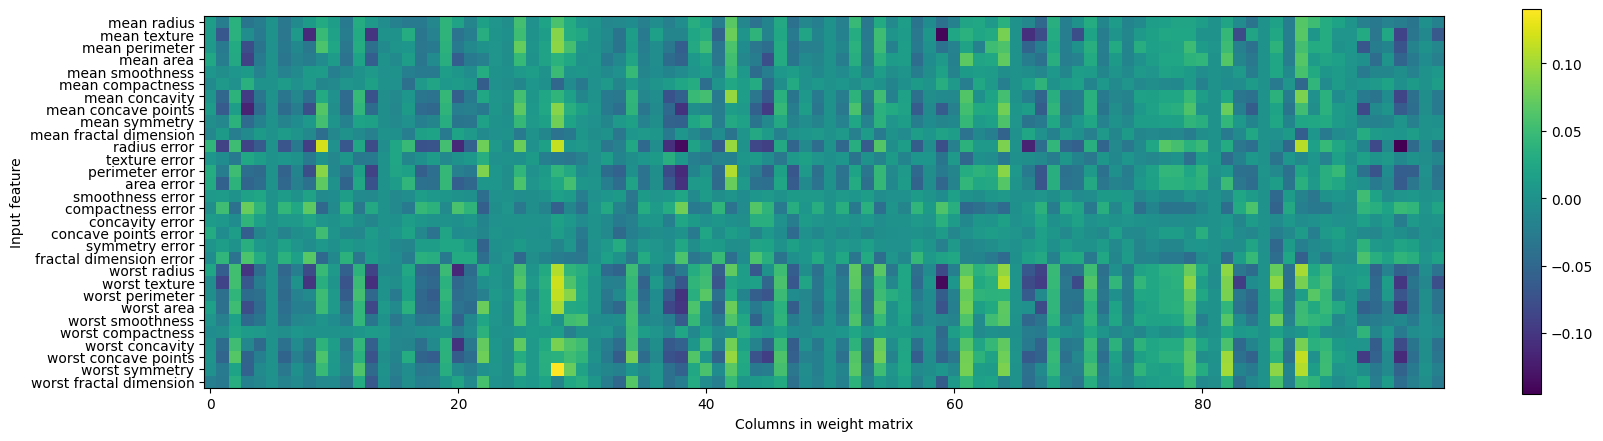

In [23]:
# Introspecting the neural network learning by looking at the weights in the model
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

These are the weights learned connecting the input to the first hidden layer. There are 100 hidden units represented in columns. Light colors represent large positive values, while dark colors represent negative values.

Strengths:<Br/>
- Able to capture info contained in large amounts of data
- Able to build incredibly complex models
- Works best with "homogeneous" data, where all features have similar meanings
<br/>

Weakness:<br/>
- Takes a long time to train
- Requires careful preprocessing of data
- Doesn't work well with different kinds of features